In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = np.hstack((x_csv[:, 1], x_csv[:, 2], x_csv[:, 4], x_csv[:, 5], x_csv[:, 7],
                       x_csv[:, 8], x_csv[:, 10], x_csv[:, 11], x_csv[:, 13], x_csv[:, 14]))

In [7]:
x_5degree.shape

(4380,)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 10, 1)


In [18]:
print(x_test.shape)

(44, 10, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1017
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0993
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0948
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0895
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0873
Epoch 9/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0859
Epoch 10/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0797
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0777
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0777
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0775
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 175/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0773
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 337/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0729
Epoch 338/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 339/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 340/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0729
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 418/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 419/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 421/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0705
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 497/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 499/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0686
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0686
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 660/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0642
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0623
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0625
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0622
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0622
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 907/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0609
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0609
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0614
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 914/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0591
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0593
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 994/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0583
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 1072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 1073/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 1074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0582
Epoch 1075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0581
Epoch 1076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 1077/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 1079/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 1153/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0566
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1156/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 1157/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 1158/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0566
Epoch 1159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 1161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 1234/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 1235/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0557
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0555
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 1238/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 1239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 1240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0555
Epoch 1243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 1316/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1317/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0544
Epoch 1318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 1319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0544
Epoch 1320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 1323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 1324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0544
Epoch 1325/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0529
Epoch 1398/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0528
Epoch 1399/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0530
Epoch 1400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0535
Epoch 1401/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 1403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 1404/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0530
Epoch 1405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0530
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0531
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0523
Epoch 1480/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0515
Epoch 1483/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0521
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0521
Epoch 1486/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 1487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 1488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1489/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0512
Epoch 1562/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0513
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 1566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 1567/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0511
Epoch 1568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 1569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 1570/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 1571/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1644/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1645/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 1646/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0493
Epoch 1647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0492
Epoch 1648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 1649/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 1650/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 1651/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0498
Epoch 1652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0501
Epoch 1653/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 1726/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 1727/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0489
Epoch 1728/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1729/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 1730/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 1731/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 1732/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 1733/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 1734/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 1735/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0478
Epoch 1808/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1809/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0482
Epoch 1810/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 1811/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 1812/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 1813/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 1814/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 1815/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 1817/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 1890/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 1891/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 1892/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 1893/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 1895/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1899/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 1981/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 2059/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 2060/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 2063/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 2140/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 2145/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 2219/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 2221/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2222/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2223/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2224/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 2225/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2226/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 2227/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 2301/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 2302/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 2303/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 2304/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 2305/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2306/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2307/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 2308/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 2309/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2382/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 2383/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 2384/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 2385/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2386/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 2387/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2391/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2464/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0402
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 2473/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 2553/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 2554/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2555/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0385
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2629/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0386
Epoch 2630/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 2631/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2632/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2633/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 2634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 2635/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 2636/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 2637/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 2710/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 2711/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2712/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2713/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 2714/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2715/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2716/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 2717/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2718/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0382
Epoch 2719/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2792/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2793/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2794/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 2795/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 2796/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 2797/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2798/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 2799/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2800/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 2801/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0372
Epoch 2874/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 2875/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2876/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 2877/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 2878/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 2879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 2880/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 2881/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 2882/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0360
Epoch 2883/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 2956/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 2957/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 2958/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 2959/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 2960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 2961/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 2962/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 2963/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0360
Epoch 2964/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 2965/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 3038/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 3039/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 3040/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 3041/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 3042/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 3043/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 3044/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 3045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0347
Epoch 3046/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 3047/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 3120/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3121/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 3122/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 3123/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3124/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3125/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3126/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3127/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 3128/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 3129/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 3202/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 3203/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3204/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3206/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 3207/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 3208/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 3209/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 3210/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3211/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3284/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3285/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 3286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3287/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3288/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0329
Epoch 3289/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3290/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3291/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3292/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3293/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3366/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 3367/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3368/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3369/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3370/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0327
Epoch 3371/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3372/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3373/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3374/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3375/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3448/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3449/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3450/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3451/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3452/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0330
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3457/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 3530/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0312
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 3539/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 3621/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3703/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0296
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 3783/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 3784/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 3785/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 3861/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 3862/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3863/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 3864/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3865/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 3866/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3867/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 3940/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 3941/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 3942/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3943/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3944/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 3945/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0276
Epoch 3946/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 3947/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 3948/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3949/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4022/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 4023/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4024/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 4025/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 4026/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4031/10000


10/10 [==============================] - 0s 5ms/step - loss: 9.9745e-04 - rmse: 0.0271
Epoch 4103/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0274
Epoch 4104/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4105/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4106/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8923e-04 - rmse: 0.0270
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7964e-04 - rmse: 0.0268
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7200e-04 - rmse: 0.0266
Epoch 4109/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4110/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9290e-04 - rmse: 0.0270
Epoch 4111/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.02

Epoch 4182/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5697e-04 - rmse: 0.0264
Epoch 4183/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6005e-04 - rmse: 0.0264
Epoch 4184/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5544e-04 - rmse: 0.0263
Epoch 4185/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6464e-04 - rmse: 0.0265
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8159e-04 - rmse: 0.0268
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4983e-04 - rmse: 0.0262
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5527e-04 - rmse: 0.0263
Epoch 4189/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8219e-04 - rmse: 0.0268
Epoch 4190/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9417e-04 - rmse: 0.0270
Epoch 4191/10000
10/10 [==============================] - 0s 5ms

10/10 [==============================] - 0s 5ms/step - loss: 9.9943e-04 - rmse: 0.0271
Epoch 4262/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 4263/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9732e-04 - rmse: 0.0271
Epoch 4264/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5921e-04 - rmse: 0.0264
Epoch 4265/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3200e-04 - rmse: 0.0259
Epoch 4266/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2975e-04 - rmse: 0.0258
Epoch 4267/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2670e-04 - rmse: 0.0258
Epoch 4268/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1911e-04 - rmse: 0.0256
Epoch 4269/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3788e-04 - rmse: 0.0260
Epoch 4270/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2037e

Epoch 4340/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1269e-04 - rmse: 0.0255
Epoch 4341/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2533e-04 - rmse: 0.0257
Epoch 4342/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3932e-04 - rmse: 0.0260
Epoch 4343/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3189e-04 - rmse: 0.0259
Epoch 4344/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5272e-04 - rmse: 0.0263
Epoch 4345/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2808e-04 - rmse: 0.0258
Epoch 4346/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9269e-04 - rmse: 0.0251
Epoch 4347/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8910e-04 - rmse: 0.0250
Epoch 4348/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8290e-04 - rmse: 0.0249
Epoch 4349/10000
10/10 [==============================] - 0s 5ms

10/10 [==============================] - 0s 5ms/step - loss: 9.0354e-04 - rmse: 0.0253
Epoch 4419/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0944e-04 - rmse: 0.0254
Epoch 4420/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3473e-04 - rmse: 0.0259
Epoch 4421/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3211e-04 - rmse: 0.0258
Epoch 4422/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1088e-04 - rmse: 0.0254
Epoch 4423/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4410e-04 - rmse: 0.0261
Epoch 4424/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2615e-04 - rmse: 0.0257
Epoch 4425/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5457e-04 - rmse: 0.0263
Epoch 4426/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3995e-04 - rmse: 0.0260
Epoch 4427/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 5ms/step - loss: 8.6649e-04 - rmse: 0.0245
Epoch 4497/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7644e-04 - rmse: 0.0247
Epoch 4498/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8583e-04 - rmse: 0.0249
Epoch 4499/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8311e-04 - rmse: 0.0249
Epoch 4500/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0891e-04 - rmse: 0.0254
Epoch 4501/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1694e-04 - rmse: 0.0255
Epoch 4502/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1663e-04 - rmse: 0.0255
Epoch 4503/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8972e-04 - rmse: 0.0250
Epoch 4504/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0316e-04 - rmse: 0.0253
Epoch 4505/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.3432e-04 - rmse: 0.0239
Epoch 4575/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4824e-04 - rmse: 0.0242
Epoch 4576/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8301e-04 - rmse: 0.0249
Epoch 4577/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7420e-04 - rmse: 0.0247
Epoch 4578/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6318e-04 - rmse: 0.0245
Epoch 4579/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5826e-04 - rmse: 0.0244
Epoch 4580/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4209e-04 - rmse: 0.0240
Epoch 4581/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6618e-04 - rmse: 0.0245
Epoch 4582/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5379e-04 - rmse: 0.0243
Epoch 4583/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.4552e-04 - rmse: 0.0241
Epoch 4653/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3682e-04 - rmse: 0.0239
Epoch 4654/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5918e-04 - rmse: 0.0244
Epoch 4655/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5348e-04 - rmse: 0.0243
Epoch 4656/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4546e-04 - rmse: 0.0241
Epoch 4657/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1823e-04 - rmse: 0.0235
Epoch 4658/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5576e-04 - rmse: 0.0243
Epoch 4659/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4093e-04 - rmse: 0.0240
Epoch 4660/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5650e-04 - rmse: 0.0243
Epoch 4661/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 7.9812e-04 - rmse: 0.0231
Epoch 4731/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9432e-04 - rmse: 0.0230
Epoch 4732/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1863e-04 - rmse: 0.0235
Epoch 4733/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2546e-04 - rmse: 0.0237
Epoch 4734/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3548e-04 - rmse: 0.0239
Epoch 4735/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0470e-04 - rmse: 0.0232
Epoch 4736/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9456e-04 - rmse: 0.0230
Epoch 4737/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8591e-04 - rmse: 0.0228
Epoch 4738/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9264e-04 - rmse: 0.0230
Epoch 4739/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.9900e-04 - rmse: 0.0231
Epoch 4809/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0049e-04 - rmse: 0.0231
Epoch 4810/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8251e-04 - rmse: 0.0227
Epoch 4811/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1571e-04 - rmse: 0.0235
Epoch 4812/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0162e-04 - rmse: 0.0232
Epoch 4813/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9298e-04 - rmse: 0.0230
Epoch 4814/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7773e-04 - rmse: 0.0226
Epoch 4815/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9333e-04 - rmse: 0.0230
Epoch 4816/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9667e-04 - rmse: 0.0231
Epoch 4817/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 8.0326e-04 - rmse: 0.0232
Epoch 4887/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9350e-04 - rmse: 0.0230
Epoch 4888/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8680e-04 - rmse: 0.0228
Epoch 4889/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7786e-04 - rmse: 0.0226
Epoch 4890/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9996e-04 - rmse: 0.0231
Epoch 4891/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0935e-04 - rmse: 0.0233
Epoch 4892/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9142e-04 - rmse: 0.0229
Epoch 4893/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7578e-04 - rmse: 0.0226
Epoch 4894/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6882e-04 - rmse: 0.0224
Epoch 4895/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.7809e-04 - rmse: 0.0226
Epoch 4965/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7731e-04 - rmse: 0.0226
Epoch 4966/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1033e-04 - rmse: 0.0233
Epoch 4967/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0625e-04 - rmse: 0.0233
Epoch 4968/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8273e-04 - rmse: 0.0227
Epoch 4969/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8274e-04 - rmse: 0.0227
Epoch 4970/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6193e-04 - rmse: 0.0223
Epoch 4971/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4622e-04 - rmse: 0.0219
Epoch 4972/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7159e-04 - rmse: 0.0225
Epoch 4973/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 8.1910e-04 - rmse: 0.0235
Epoch 5043/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9968e-04 - rmse: 0.0231
Epoch 5044/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5679e-04 - rmse: 0.0243
Epoch 5045/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2780e-04 - rmse: 0.0237
Epoch 5046/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4159e-04 - rmse: 0.0240
Epoch 5047/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2204e-04 - rmse: 0.0236
Epoch 5048/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2436e-04 - rmse: 0.0236
Epoch 5049/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8438e-04 - rmse: 0.0228
Epoch 5050/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8486e-04 - rmse: 0.0228
Epoch 5051/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.3946e-04 - rmse: 0.0218
Epoch 5121/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6564e-04 - rmse: 0.0224
Epoch 5122/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4143e-04 - rmse: 0.0218
Epoch 5123/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4126e-04 - rmse: 0.0218
Epoch 5124/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2904e-04 - rmse: 0.0215
Epoch 5125/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2989e-04 - rmse: 0.0216
Epoch 5126/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2698e-04 - rmse: 0.0215
Epoch 5127/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2600e-04 - rmse: 0.0215
Epoch 5128/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3200e-04 - rmse: 0.0216
Epoch 5129/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.5460e-04 - rmse: 0.0221
Epoch 5199/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6295e-04 - rmse: 0.0223
Epoch 5200/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5583e-04 - rmse: 0.0221
Epoch 5201/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4573e-04 - rmse: 0.0219
Epoch 5202/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5749e-04 - rmse: 0.0222
Epoch 5203/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6537e-04 - rmse: 0.0224
Epoch 5204/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6728e-04 - rmse: 0.0224
Epoch 5205/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6193e-04 - rmse: 0.0223
Epoch 5206/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0851e-04 - rmse: 0.0211
Epoch 5207/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 7.6021e-04 - rmse: 0.0223
Epoch 5277/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8996e-04 - rmse: 0.0229
Epoch 5278/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5883e-04 - rmse: 0.0222
Epoch 5279/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6867e-04 - rmse: 0.0224
Epoch 5280/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3190e-04 - rmse: 0.0216
Epoch 5281/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3202e-04 - rmse: 0.0216
Epoch 5282/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3589e-04 - rmse: 0.0217
Epoch 5283/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3477e-04 - rmse: 0.0217
Epoch 5284/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2556e-04 - rmse: 0.0215
Epoch 5285/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 6.9118e-04 - rmse: 0.0206
Epoch 5355/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8777e-04 - rmse: 0.0206
Epoch 5356/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9045e-04 - rmse: 0.0206
Epoch 5357/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9839e-04 - rmse: 0.0208
Epoch 5358/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0559e-04 - rmse: 0.0210
Epoch 5359/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2288e-04 - rmse: 0.0214
Epoch 5360/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2381e-04 - rmse: 0.0214
Epoch 5361/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1177e-04 - rmse: 0.0211
Epoch 5362/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9531e-04 - rmse: 0.0207
Epoch 5363/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 7.1110e-04 - rmse: 0.0211
Epoch 5433/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3712e-04 - rmse: 0.0217
Epoch 5434/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3235e-04 - rmse: 0.0216
Epoch 5435/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4617e-04 - rmse: 0.0219
Epoch 5436/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2262e-04 - rmse: 0.0214
Epoch 5437/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1163e-04 - rmse: 0.0211
Epoch 5438/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1092e-04 - rmse: 0.0211
Epoch 5439/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7231e-04 - rmse: 0.0225
Epoch 5440/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2144e-04 - rmse: 0.0236
Epoch 5441/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 6.8737e-04 - rmse: 0.0206
Epoch 5511/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9361e-04 - rmse: 0.0207
Epoch 5512/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8286e-04 - rmse: 0.0205
Epoch 5513/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7772e-04 - rmse: 0.0203
Epoch 5514/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7815e-04 - rmse: 0.0203
Epoch 5515/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8174e-04 - rmse: 0.0204
Epoch 5516/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1774e-04 - rmse: 0.0213
Epoch 5517/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3160e-04 - rmse: 0.0216
Epoch 5518/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9719e-04 - rmse: 0.0208
Epoch 5519/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.6720e-04 - rmse: 0.0201
Epoch 5589/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6184e-04 - rmse: 0.0199
Epoch 5590/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8825e-04 - rmse: 0.0206
Epoch 5591/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0700e-04 - rmse: 0.0210
Epoch 5592/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1436e-04 - rmse: 0.0212
Epoch 5593/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0180e-04 - rmse: 0.0209
Epoch 5594/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8397e-04 - rmse: 0.0205
Epoch 5595/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6704e-04 - rmse: 0.0201
Epoch 5596/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5931e-04 - rmse: 0.0199
Epoch 5597/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 6.5089e-04 - rmse: 0.0197
Epoch 5667/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5374e-04 - rmse: 0.0197
Epoch 5668/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3961e-04 - rmse: 0.0194
Epoch 5669/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3625e-04 - rmse: 0.0193
Epoch 5670/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5018e-04 - rmse: 0.0197
Epoch 5671/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3677e-04 - rmse: 0.0193
Epoch 5672/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3375e-04 - rmse: 0.0192
Epoch 5673/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4657e-04 - rmse: 0.0196
Epoch 5674/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4362e-04 - rmse: 0.0195
Epoch 5675/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.4563e-04 - rmse: 0.0195
Epoch 5745/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5184e-04 - rmse: 0.0197
Epoch 5746/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4982e-04 - rmse: 0.0197
Epoch 5747/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6761e-04 - rmse: 0.0201
Epoch 5748/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5189e-04 - rmse: 0.0197
Epoch 5749/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4885e-04 - rmse: 0.0196
Epoch 5750/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9345e-04 - rmse: 0.0207
Epoch 5751/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7298e-04 - rmse: 0.0202
Epoch 5752/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5642e-04 - rmse: 0.0198
Epoch 5753/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 6.5833e-04 - rmse: 0.0199
Epoch 5823/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5866e-04 - rmse: 0.0199
Epoch 5824/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4292e-04 - rmse: 0.0195
Epoch 5825/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5868e-04 - rmse: 0.0199
Epoch 5826/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5285e-04 - rmse: 0.0197
Epoch 5827/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4518e-04 - rmse: 0.0195
Epoch 5828/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7285e-04 - rmse: 0.0202
Epoch 5829/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9058e-04 - rmse: 0.0207
Epoch 5830/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7113e-04 - rmse: 0.0202
Epoch 5831/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.4980e-04 - rmse: 0.0197
Epoch 5901/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3353e-04 - rmse: 0.0193
Epoch 5902/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3848e-04 - rmse: 0.0194
Epoch 5903/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3913e-04 - rmse: 0.0194
Epoch 5904/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3394e-04 - rmse: 0.0193
Epoch 5905/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4566e-04 - rmse: 0.0196
Epoch 5906/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6701e-04 - rmse: 0.0201
Epoch 5907/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8360e-04 - rmse: 0.0205
Epoch 5908/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2633e-04 - rmse: 0.0191
Epoch 5909/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.6328e-04 - rmse: 0.0200
Epoch 5979/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5366e-04 - rmse: 0.0198
Epoch 5980/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4414e-04 - rmse: 0.0195
Epoch 5981/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5151e-04 - rmse: 0.0197
Epoch 5982/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3008e-04 - rmse: 0.0192
Epoch 5983/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2538e-04 - rmse: 0.0191
Epoch 5984/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2120e-04 - rmse: 0.0189
Epoch 5985/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0235e-04 - rmse: 0.0184
Epoch 5986/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0452e-04 - rmse: 0.0185
Epoch 5987/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.1449e-04 - rmse: 0.0188
Epoch 6057/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0418e-04 - rmse: 0.0185
Epoch 6058/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4416e-04 - rmse: 0.0195
Epoch 6059/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4186e-04 - rmse: 0.0195
Epoch 6060/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3957e-04 - rmse: 0.0194
Epoch 6061/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4732e-04 - rmse: 0.0196
Epoch 6062/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2832e-04 - rmse: 0.0191
Epoch 6063/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1134e-04 - rmse: 0.0187
Epoch 6064/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0412e-04 - rmse: 0.0185
Epoch 6065/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.3319e-04 - rmse: 0.0193
Epoch 6135/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4055e-04 - rmse: 0.0195
Epoch 6136/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2516e-04 - rmse: 0.0191
Epoch 6137/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0308e-04 - rmse: 0.0185
Epoch 6138/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2104e-04 - rmse: 0.0190
Epoch 6139/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3547e-04 - rmse: 0.0193
Epoch 6140/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2165e-04 - rmse: 0.0190
Epoch 6141/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9787e-04 - rmse: 0.0183
Epoch 6142/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8620e-04 - rmse: 0.0180
Epoch 6143/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.3983e-04 - rmse: 0.0195
Epoch 6213/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7119e-04 - rmse: 0.0202
Epoch 6214/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8359e-04 - rmse: 0.0206
Epoch 6215/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3431e-04 - rmse: 0.0193
Epoch 6216/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2188e-04 - rmse: 0.0190
Epoch 6217/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0643e-04 - rmse: 0.0186
Epoch 6218/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3324e-04 - rmse: 0.0193
Epoch 6219/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3317e-04 - rmse: 0.0193
Epoch 6220/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6525e-04 - rmse: 0.0201
Epoch 6221/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 5.8863e-04 - rmse: 0.0181
Epoch 6291/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8675e-04 - rmse: 0.0181
Epoch 6292/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9416e-04 - rmse: 0.0183
Epoch 6293/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2726e-04 - rmse: 0.0191
Epoch 6294/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9263e-04 - rmse: 0.0182
Epoch 6295/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7641e-04 - rmse: 0.0178
Epoch 6296/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7551e-04 - rmse: 0.0177
Epoch 6297/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7403e-04 - rmse: 0.0177
Epoch 6298/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7861e-04 - rmse: 0.0178
Epoch 6299/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.7576e-04 - rmse: 0.0178
Epoch 6369/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9867e-04 - rmse: 0.0184
Epoch 6370/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8760e-04 - rmse: 0.0181
Epoch 6371/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9023e-04 - rmse: 0.0182
Epoch 6372/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9862e-04 - rmse: 0.0184
Epoch 6373/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9579e-04 - rmse: 0.0183
Epoch 6374/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9210e-04 - rmse: 0.0182
Epoch 6375/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8857e-04 - rmse: 0.0181
Epoch 6376/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0500e-04 - rmse: 0.0186
Epoch 6377/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.6426e-04 - rmse: 0.0175
Epoch 6447/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0508e-04 - rmse: 0.0186
Epoch 6448/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8646e-04 - rmse: 0.0181
Epoch 6449/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7825e-04 - rmse: 0.0178
Epoch 6450/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6946e-04 - rmse: 0.0176
Epoch 6451/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8128e-04 - rmse: 0.0179
Epoch 6452/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7871e-04 - rmse: 0.0179
Epoch 6453/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2428e-04 - rmse: 0.0191
Epoch 6454/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1353e-04 - rmse: 0.0188
Epoch 6455/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.5181e-04 - rmse: 0.0171
Epoch 6525/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4880e-04 - rmse: 0.0170
Epoch 6526/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7033e-04 - rmse: 0.0176
Epoch 6527/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5662e-04 - rmse: 0.0172
Epoch 6528/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4967e-04 - rmse: 0.0170
Epoch 6529/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4902e-04 - rmse: 0.0170
Epoch 6530/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5867e-04 - rmse: 0.0173
Epoch 6531/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5645e-04 - rmse: 0.0172
Epoch 6532/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6028e-04 - rmse: 0.0174
Epoch 6533/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 5ms/step - loss: 5.5176e-04 - rmse: 0.0171
Epoch 6603/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5045e-04 - rmse: 0.0171
Epoch 6604/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4916e-04 - rmse: 0.0170
Epoch 6605/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4909e-04 - rmse: 0.0170
Epoch 6606/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6457e-04 - rmse: 0.0175
Epoch 6607/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5845e-04 - rmse: 0.0173
Epoch 6608/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6263e-04 - rmse: 0.0174
Epoch 6609/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8234e-04 - rmse: 0.0180
Epoch 6610/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8301e-04 - rmse: 0.0180
Epoch 6611/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 6.0624e-04 - rmse: 0.0187
Epoch 6681/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9994e-04 - rmse: 0.0185
Epoch 6682/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7042e-04 - rmse: 0.0177
Epoch 6683/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5658e-04 - rmse: 0.0173
Epoch 6684/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5090e-04 - rmse: 0.0171
Epoch 6685/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3851e-04 - rmse: 0.0167
Epoch 6686/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4171e-04 - rmse: 0.0168
Epoch 6687/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7166e-04 - rmse: 0.0177
Epoch 6688/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5428e-04 - rmse: 0.0172
Epoch 6689/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 6.0325e-04 - rmse: 0.0186
Epoch 6759/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8222e-04 - rmse: 0.0180
Epoch 6760/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5826e-04 - rmse: 0.0173
Epoch 6761/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6643e-04 - rmse: 0.0176
Epoch 6762/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6342e-04 - rmse: 0.0175
Epoch 6763/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7518e-04 - rmse: 0.0178
Epoch 6764/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9111e-04 - rmse: 0.0183
Epoch 6765/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7323e-04 - rmse: 0.0178
Epoch 6766/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6669e-04 - rmse: 0.0176
Epoch 6767/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.5513e-04 - rmse: 0.0173
Epoch 6837/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2952e-04 - rmse: 0.0165
Epoch 6838/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2986e-04 - rmse: 0.0165
Epoch 6839/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3810e-04 - rmse: 0.0168
Epoch 6840/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3686e-04 - rmse: 0.0167
Epoch 6841/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7031e-04 - rmse: 0.0177
Epoch 6842/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8170e-04 - rmse: 0.0180
Epoch 6843/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7674e-04 - rmse: 0.0179
Epoch 6844/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7262e-04 - rmse: 0.0178
Epoch 6845/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.5487e-04 - rmse: 0.0173
Epoch 6915/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4339e-04 - rmse: 0.0169
Epoch 6916/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3995e-04 - rmse: 0.0168
Epoch 6917/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4784e-04 - rmse: 0.0171
Epoch 6918/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5181e-04 - rmse: 0.0172
Epoch 6919/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6562e-04 - rmse: 0.0176
Epoch 6920/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4427e-04 - rmse: 0.0170
Epoch 6921/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4465e-04 - rmse: 0.0170
Epoch 6922/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4710e-04 - rmse: 0.0170
Epoch 6923/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.6255e-04 - rmse: 0.0175
Epoch 6993/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4374e-04 - rmse: 0.0170
Epoch 6994/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3592e-04 - rmse: 0.0167
Epoch 6995/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2852e-04 - rmse: 0.0165
Epoch 6996/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5647e-04 - rmse: 0.0173
Epoch 6997/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4905e-04 - rmse: 0.0171
Epoch 6998/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3517e-04 - rmse: 0.0167
Epoch 6999/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2096e-04 - rmse: 0.0163
Epoch 7000/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2112e-04 - rmse: 0.0163
Epoch 7001/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.7654e-04 - rmse: 0.0179
Epoch 7071/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5514e-04 - rmse: 0.0173
Epoch 7072/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3959e-04 - rmse: 0.0169
Epoch 7073/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4817e-04 - rmse: 0.0171
Epoch 7074/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2248e-04 - rmse: 0.0163
Epoch 7075/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1435e-04 - rmse: 0.0161
Epoch 7076/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1680e-04 - rmse: 0.0162
Epoch 7077/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0964e-04 - rmse: 0.0159
Epoch 7078/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0835e-04 - rmse: 0.0159
Epoch 7079/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.2369e-04 - rmse: 0.0164
Epoch 7149/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2659e-04 - rmse: 0.0165
Epoch 7150/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1184e-04 - rmse: 0.0160
Epoch 7151/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3399e-04 - rmse: 0.0167
Epoch 7152/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7008e-04 - rmse: 0.0178
Epoch 7153/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7069e-04 - rmse: 0.0178
Epoch 7154/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3335e-04 - rmse: 0.0167
Epoch 7155/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1974e-04 - rmse: 0.0163
Epoch 7156/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2895e-04 - rmse: 0.0166
Epoch 7157/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 4.9572e-04 - rmse: 0.0155
Epoch 7227/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0397e-04 - rmse: 0.0158
Epoch 7228/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9981e-04 - rmse: 0.0157
Epoch 7229/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9647e-04 - rmse: 0.0156
Epoch 7230/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0058e-04 - rmse: 0.0157
Epoch 7231/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2775e-04 - rmse: 0.0165
Epoch 7232/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1810e-04 - rmse: 0.0162
Epoch 7233/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0561e-04 - rmse: 0.0159
Epoch 7234/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0610e-04 - rmse: 0.0159
Epoch 7235/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.5146e-04 - rmse: 0.0173
Epoch 7305/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4519e-04 - rmse: 0.0171
Epoch 7306/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2908e-04 - rmse: 0.0166
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2524e-04 - rmse: 0.0165
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1148e-04 - rmse: 0.0161
Epoch 7309/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2132e-04 - rmse: 0.0164
Epoch 7310/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0565e-04 - rmse: 0.0159
Epoch 7311/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0174e-04 - rmse: 0.0158
Epoch 7312/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9767e-04 - rmse: 0.0156
Epoch 7313/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 5.1679e-04 - rmse: 0.0162
Epoch 7383/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9943e-04 - rmse: 0.0157
Epoch 7384/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8650e-04 - rmse: 0.0153
Epoch 7385/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0351e-04 - rmse: 0.0158
Epoch 7386/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9572e-04 - rmse: 0.0156
Epoch 7387/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8753e-04 - rmse: 0.0153
Epoch 7388/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8973e-04 - rmse: 0.0154
Epoch 7389/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8673e-04 - rmse: 0.0153
Epoch 7390/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0983e-04 - rmse: 0.0160
Epoch 7391/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.1033e-04 - rmse: 0.0161
Epoch 7461/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9377e-04 - rmse: 0.0155
Epoch 7462/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0058e-04 - rmse: 0.0158
Epoch 7463/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0042e-04 - rmse: 0.0158
Epoch 7464/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7972e-04 - rmse: 0.0151
Epoch 7465/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9638e-04 - rmse: 0.0156
Epoch 7466/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1624e-04 - rmse: 0.0162
Epoch 7467/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1514e-04 - rmse: 0.0162
Epoch 7468/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1303e-04 - rmse: 0.0161
Epoch 7469/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.0928e-04 - rmse: 0.0160
Epoch 7539/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0873e-04 - rmse: 0.0160
Epoch 7540/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0161e-04 - rmse: 0.0158
Epoch 7541/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9089e-04 - rmse: 0.0155
Epoch 7542/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8912e-04 - rmse: 0.0154
Epoch 7543/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8308e-04 - rmse: 0.0152
Epoch 7544/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8828e-04 - rmse: 0.0154
Epoch 7545/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8997e-04 - rmse: 0.0154
Epoch 7546/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9402e-04 - rmse: 0.0156
Epoch 7547/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 5.0970e-04 - rmse: 0.0161
Epoch 7617/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0091e-04 - rmse: 0.0158
Epoch 7618/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9016e-04 - rmse: 0.0155
Epoch 7619/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8316e-04 - rmse: 0.0152
Epoch 7620/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8503e-04 - rmse: 0.0153
Epoch 7621/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1513e-04 - rmse: 0.0163
Epoch 7622/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3424e-04 - rmse: 0.0168
Epoch 7623/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8282e-04 - rmse: 0.0152
Epoch 7624/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8310e-04 - rmse: 0.0152
Epoch 7625/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.8023e-04 - rmse: 0.0152
Epoch 7695/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7450e-04 - rmse: 0.0150
Epoch 7696/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7101e-04 - rmse: 0.0149
Epoch 7697/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7761e-04 - rmse: 0.0151
Epoch 7698/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6898e-04 - rmse: 0.0148
Epoch 7699/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7471e-04 - rmse: 0.0150
Epoch 7700/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7155e-04 - rmse: 0.0149
Epoch 7701/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0330e-04 - rmse: 0.0159
Epoch 7702/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2425e-04 - rmse: 0.0165
Epoch 7703/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 4.9498e-04 - rmse: 0.0157
Epoch 7773/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9051e-04 - rmse: 0.0155
Epoch 7774/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0275e-04 - rmse: 0.0159
Epoch 7775/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1210e-04 - rmse: 0.0162
Epoch 7776/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9288e-04 - rmse: 0.0156
Epoch 7777/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8189e-04 - rmse: 0.0152
Epoch 7778/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7081e-04 - rmse: 0.0149
Epoch 7779/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5859e-04 - rmse: 0.0145
Epoch 7780/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6938e-04 - rmse: 0.0148
Epoch 7781/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 5.0641e-04 - rmse: 0.0160
Epoch 7851/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8582e-04 - rmse: 0.0154
Epoch 7852/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7764e-04 - rmse: 0.0151
Epoch 7853/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8199e-04 - rmse: 0.0153
Epoch 7854/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7435e-04 - rmse: 0.0150
Epoch 7855/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7493e-04 - rmse: 0.0150
Epoch 7856/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8104e-04 - rmse: 0.0152
Epoch 7857/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8742e-04 - rmse: 0.0154
Epoch 7858/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9788e-04 - rmse: 0.0158
Epoch 7859/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.7839e-04 - rmse: 0.0152
Epoch 7929/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7407e-04 - rmse: 0.0150
Epoch 7930/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7115e-04 - rmse: 0.0149
Epoch 7931/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7414e-04 - rmse: 0.0150
Epoch 7932/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7713e-04 - rmse: 0.0151
Epoch 7933/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9535e-04 - rmse: 0.0157
Epoch 7934/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9678e-04 - rmse: 0.0158
Epoch 7935/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8006e-04 - rmse: 0.0152
Epoch 7936/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7448e-04 - rmse: 0.0150
Epoch 7937/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.8917e-04 - rmse: 0.0155
Epoch 8007/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7855e-04 - rmse: 0.0152
Epoch 8008/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6299e-04 - rmse: 0.0147
Epoch 8009/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5321e-04 - rmse: 0.0143
Epoch 8010/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6629e-04 - rmse: 0.0148
Epoch 8011/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6944e-04 - rmse: 0.0149
Epoch 8012/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6315e-04 - rmse: 0.0147
Epoch 8013/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5817e-04 - rmse: 0.0145
Epoch 8014/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4993e-04 - rmse: 0.0142
Epoch 8015/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.6236e-04 - rmse: 0.0147
Epoch 8085/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6313e-04 - rmse: 0.0147
Epoch 8086/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7207e-04 - rmse: 0.0150
Epoch 8087/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7384e-04 - rmse: 0.0151
Epoch 8088/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6932e-04 - rmse: 0.0149
Epoch 8089/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5703e-04 - rmse: 0.0145
Epoch 8090/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5719e-04 - rmse: 0.0145
Epoch 8091/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5792e-04 - rmse: 0.0145
Epoch 8092/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5638e-04 - rmse: 0.0145
Epoch 8093/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.9228e-04 - rmse: 0.0157
Epoch 8163/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8920e-04 - rmse: 0.0156
Epoch 8164/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9802e-04 - rmse: 0.0159
Epoch 8165/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6125e-04 - rmse: 0.0147
Epoch 8166/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7860e-04 - rmse: 0.0152
Epoch 8167/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8350e-04 - rmse: 0.0154
Epoch 8168/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7797e-04 - rmse: 0.0152
Epoch 8169/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5670e-04 - rmse: 0.0145
Epoch 8170/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6617e-04 - rmse: 0.0148
Epoch 8171/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.7700e-04 - rmse: 0.0152
Epoch 8241/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5643e-04 - rmse: 0.0145
Epoch 8242/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4302e-04 - rmse: 0.0140
Epoch 8243/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3306e-04 - rmse: 0.0137
Epoch 8244/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5051e-04 - rmse: 0.0143
Epoch 8245/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5977e-04 - rmse: 0.0146
Epoch 8246/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5730e-04 - rmse: 0.0145
Epoch 8247/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4543e-04 - rmse: 0.0141
Epoch 8248/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5237e-04 - rmse: 0.0144
Epoch 8249/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.4726e-04 - rmse: 0.0142
Epoch 8319/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6949e-04 - rmse: 0.0150
Epoch 8320/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6742e-04 - rmse: 0.0149
Epoch 8321/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8156e-04 - rmse: 0.0154
Epoch 8322/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6883e-04 - rmse: 0.0150
Epoch 8323/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4032e-04 - rmse: 0.0140
Epoch 8324/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3769e-04 - rmse: 0.0139
Epoch 8325/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5020e-04 - rmse: 0.0143
Epoch 8326/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4854e-04 - rmse: 0.0143
Epoch 8327/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.4251e-04 - rmse: 0.0141
Epoch 8397/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5747e-04 - rmse: 0.0146
Epoch 8398/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5173e-04 - rmse: 0.0144
Epoch 8399/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5358e-04 - rmse: 0.0145
Epoch 8400/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5709e-04 - rmse: 0.0146
Epoch 8401/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4582e-04 - rmse: 0.0142
Epoch 8402/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4360e-04 - rmse: 0.0141
Epoch 8403/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4238e-04 - rmse: 0.0141
Epoch 8404/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5302e-04 - rmse: 0.0144
Epoch 8405/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.5553e-04 - rmse: 0.0145
Epoch 8475/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7039e-04 - rmse: 0.0151
Epoch 8476/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9587e-04 - rmse: 0.0159
Epoch 8477/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6995e-04 - rmse: 0.0150
Epoch 8478/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5698e-04 - rmse: 0.0146
Epoch 8479/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5033e-04 - rmse: 0.0144
Epoch 8480/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4668e-04 - rmse: 0.0142
Epoch 8481/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5292e-04 - rmse: 0.0145
Epoch 8482/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4871e-04 - rmse: 0.0143
Epoch 8483/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.2614e-04 - rmse: 0.0135
Epoch 8553/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2497e-04 - rmse: 0.0135
Epoch 8554/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3379e-04 - rmse: 0.0138
Epoch 8555/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4854e-04 - rmse: 0.0143
Epoch 8556/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5108e-04 - rmse: 0.0144
Epoch 8557/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5260e-04 - rmse: 0.0145
Epoch 8558/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6988e-04 - rmse: 0.0151
Epoch 8559/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6986e-04 - rmse: 0.0151
Epoch 8560/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4310e-04 - rmse: 0.0141
Epoch 8561/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.4385e-04 - rmse: 0.0142
Epoch 8631/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4186e-04 - rmse: 0.0141
Epoch 8632/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3736e-04 - rmse: 0.0140
Epoch 8633/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4350e-04 - rmse: 0.0142
Epoch 8634/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5555e-04 - rmse: 0.0146
Epoch 8635/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4342e-04 - rmse: 0.0142
Epoch 8636/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3945e-04 - rmse: 0.0140
Epoch 8637/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2554e-04 - rmse: 0.0135
Epoch 8638/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1128e-04 - rmse: 0.0130
Epoch 8639/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.7771e-04 - rmse: 0.0154
Epoch 8709/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5859e-04 - rmse: 0.0147
Epoch 8710/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4980e-04 - rmse: 0.0144
Epoch 8711/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3246e-04 - rmse: 0.0138
Epoch 8712/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2609e-04 - rmse: 0.0136
Epoch 8713/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4405e-04 - rmse: 0.0142
Epoch 8714/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3600e-04 - rmse: 0.0139
Epoch 8715/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2996e-04 - rmse: 0.0137
Epoch 8716/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2057e-04 - rmse: 0.0134
Epoch 8717/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.1888e-04 - rmse: 0.0133
Epoch 8787/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1226e-04 - rmse: 0.0131
Epoch 8788/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2281e-04 - rmse: 0.0135
Epoch 8789/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2766e-04 - rmse: 0.0137
Epoch 8790/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3011e-04 - rmse: 0.0137
Epoch 8791/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3888e-04 - rmse: 0.0141
Epoch 8792/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3719e-04 - rmse: 0.0140
Epoch 8793/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1834e-04 - rmse: 0.0133
Epoch 8794/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2908e-04 - rmse: 0.0137
Epoch 8795/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.4170e-04 - rmse: 0.0142
Epoch 8865/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5497e-04 - rmse: 0.0146
Epoch 8866/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4248e-04 - rmse: 0.0142
Epoch 8867/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3110e-04 - rmse: 0.0138
Epoch 8868/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2577e-04 - rmse: 0.0136
Epoch 8869/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2563e-04 - rmse: 0.0136
Epoch 8870/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2930e-04 - rmse: 0.0137
Epoch 8871/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3680e-04 - rmse: 0.0140
Epoch 8872/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6450e-04 - rmse: 0.0150
Epoch 8873/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.2142e-04 - rmse: 0.0135
Epoch 8943/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3667e-04 - rmse: 0.0140
Epoch 8944/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1344e-04 - rmse: 0.0132
Epoch 8945/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1729e-04 - rmse: 0.0133
Epoch 8946/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2686e-04 - rmse: 0.0137
Epoch 8947/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1736e-04 - rmse: 0.0133
Epoch 8948/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1898e-04 - rmse: 0.0134
Epoch 8949/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2120e-04 - rmse: 0.0135
Epoch 8950/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1861e-04 - rmse: 0.0134
Epoch 8951/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.2831e-04 - rmse: 0.0138
Epoch 9021/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2508e-04 - rmse: 0.0136
Epoch 9022/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0918e-04 - rmse: 0.0130
Epoch 9023/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1264e-04 - rmse: 0.0132
Epoch 9024/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2386e-04 - rmse: 0.0136
Epoch 9025/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1177e-04 - rmse: 0.0131
Epoch 9026/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1015e-04 - rmse: 0.0131
Epoch 9027/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1086e-04 - rmse: 0.0131
Epoch 9028/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2607e-04 - rmse: 0.0137
Epoch 9029/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.0763e-04 - rmse: 0.0130
Epoch 9099/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1214e-04 - rmse: 0.0132
Epoch 9100/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1671e-04 - rmse: 0.0133
Epoch 9101/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0556e-04 - rmse: 0.0129
Epoch 9102/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9857e-04 - rmse: 0.0127
Epoch 9103/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0894e-04 - rmse: 0.0131
Epoch 9104/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1080e-04 - rmse: 0.0131
Epoch 9105/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2281e-04 - rmse: 0.0136
Epoch 9106/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1657e-04 - rmse: 0.0133
Epoch 9107/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.0975e-04 - rmse: 0.0131
Epoch 9177/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0998e-04 - rmse: 0.0131
Epoch 9178/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0991e-04 - rmse: 0.0131
Epoch 9179/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1814e-04 - rmse: 0.0134
Epoch 9180/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2888e-04 - rmse: 0.0138
Epoch 9181/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6580e-04 - rmse: 0.0151
Epoch 9182/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8132e-04 - rmse: 0.0156
Epoch 9183/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4180e-04 - rmse: 0.0143
Epoch 9184/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3087e-04 - rmse: 0.0139
Epoch 9185/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 3.9005e-04 - rmse: 0.0124
Epoch 9255/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9629e-04 - rmse: 0.0126
Epoch 9256/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0601e-04 - rmse: 0.0130
Epoch 9257/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2009e-04 - rmse: 0.0135
Epoch 9258/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1093e-04 - rmse: 0.0132
Epoch 9259/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2019e-04 - rmse: 0.0135
Epoch 9260/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1813e-04 - rmse: 0.0135
Epoch 9261/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0964e-04 - rmse: 0.0131
Epoch 9262/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2676e-04 - rmse: 0.0138
Epoch 9263/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.2204e-04 - rmse: 0.0136
Epoch 9333/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1308e-04 - rmse: 0.0133
Epoch 9334/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1359e-04 - rmse: 0.0133
Epoch 9335/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1021e-04 - rmse: 0.0132
Epoch 9336/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1340e-04 - rmse: 0.0133
Epoch 9337/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9712e-04 - rmse: 0.0127
Epoch 9338/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9834e-04 - rmse: 0.0127
Epoch 9339/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9994e-04 - rmse: 0.0128
Epoch 9340/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0896e-04 - rmse: 0.0131
Epoch 9341/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.2392e-04 - rmse: 0.0137
Epoch 9411/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0174e-04 - rmse: 0.0129
Epoch 9412/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0322e-04 - rmse: 0.0129
Epoch 9413/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9336e-04 - rmse: 0.0126
Epoch 9414/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9238e-04 - rmse: 0.0125
Epoch 9415/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8970e-04 - rmse: 0.0124
Epoch 9416/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0815e-04 - rmse: 0.0131
Epoch 9417/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2417e-04 - rmse: 0.0137
Epoch 9418/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1604e-04 - rmse: 0.0134
Epoch 9419/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.9825e-04 - rmse: 0.0128
Epoch 9489/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9305e-04 - rmse: 0.0126
Epoch 9490/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9391e-04 - rmse: 0.0126
Epoch 9491/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9444e-04 - rmse: 0.0126
Epoch 9492/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8935e-04 - rmse: 0.0124
Epoch 9493/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8203e-04 - rmse: 0.0121
Epoch 9494/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8104e-04 - rmse: 0.0121
Epoch 9495/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8622e-04 - rmse: 0.0123
Epoch 9496/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8455e-04 - rmse: 0.0122
Epoch 9497/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.9042e-04 - rmse: 0.0125
Epoch 9567/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8077e-04 - rmse: 0.0121
Epoch 9568/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8060e-04 - rmse: 0.0121
Epoch 9569/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8205e-04 - rmse: 0.0121
Epoch 9570/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9086e-04 - rmse: 0.0125
Epoch 9571/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8511e-04 - rmse: 0.0123
Epoch 9572/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0335e-04 - rmse: 0.0130
Epoch 9573/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9072e-04 - rmse: 0.0125
Epoch 9574/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9548e-04 - rmse: 0.0127
Epoch 9575/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 4.0188e-04 - rmse: 0.0130
Epoch 9645/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9510e-04 - rmse: 0.0127
Epoch 9646/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8093e-04 - rmse: 0.0121
Epoch 9647/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8217e-04 - rmse: 0.0122
Epoch 9648/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8138e-04 - rmse: 0.0121
Epoch 9649/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0104e-04 - rmse: 0.0129
Epoch 9650/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0972e-04 - rmse: 0.0133
Epoch 9651/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1036e-04 - rmse: 0.0133
Epoch 9652/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8995e-04 - rmse: 0.0125
Epoch 9653/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.8116e-04 - rmse: 0.0122
Epoch 9723/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8694e-04 - rmse: 0.0124
Epoch 9724/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8629e-04 - rmse: 0.0124
Epoch 9725/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8416e-04 - rmse: 0.0123
Epoch 9726/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7090e-04 - rmse: 0.0117
Epoch 9727/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6874e-04 - rmse: 0.0116
Epoch 9728/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6860e-04 - rmse: 0.0116
Epoch 9729/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6733e-04 - rmse: 0.0116
Epoch 9730/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7512e-04 - rmse: 0.0119
Epoch 9731/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 6ms/step - loss: 4.1376e-04 - rmse: 0.0135
Epoch 9801/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1140e-04 - rmse: 0.0134
Epoch 9802/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9095e-04 - rmse: 0.0126
Epoch 9803/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8025e-04 - rmse: 0.0122
Epoch 9804/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8508e-04 - rmse: 0.0124
Epoch 9805/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8718e-04 - rmse: 0.0124
Epoch 9806/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8898e-04 - rmse: 0.0125
Epoch 9807/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8250e-04 - rmse: 0.0122
Epoch 9808/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7622e-04 - rmse: 0.0120
Epoch 9809/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 6ms/step - loss: 3.6249e-04 - rmse: 0.0114
Epoch 9879/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8919e-04 - rmse: 0.0125
Epoch 9880/10000
10/10 [==============================] - 0s 8ms/step - loss: 3.9360e-04 - rmse: 0.0127
Epoch 9881/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0146e-04 - rmse: 0.0130
Epoch 9882/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0023e-04 - rmse: 0.0130
Epoch 9883/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9630e-04 - rmse: 0.0128
Epoch 9884/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8804e-04 - rmse: 0.0125
Epoch 9885/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9103e-04 - rmse: 0.0126
Epoch 9886/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8181e-04 - rmse: 0.0122
Epoch 9887/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.7821e-04 - rmse: 0.0121
Epoch 9957/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7937e-04 - rmse: 0.0122
Epoch 9958/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7921e-04 - rmse: 0.0122
Epoch 9959/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8743e-04 - rmse: 0.0125
Epoch 9960/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8451e-04 - rmse: 0.0124
Epoch 9961/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7398e-04 - rmse: 0.0120
Epoch 9962/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6887e-04 - rmse: 0.0117
Epoch 9963/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6628e-04 - rmse: 0.0116
Epoch 9964/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7626e-04 - rmse: 0.0120
Epoch 9965/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:08:36.843251


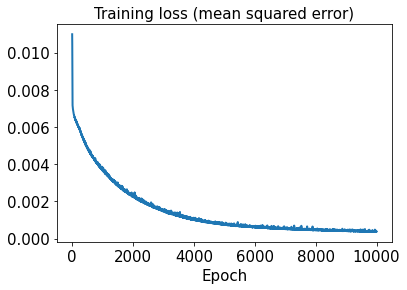

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

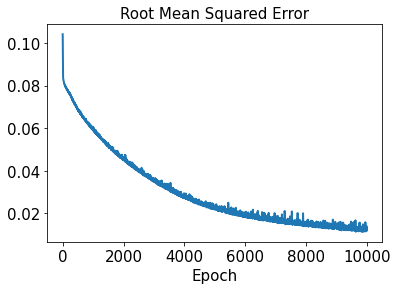

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 2.3085e-04 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.014593114


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

1.2581377


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

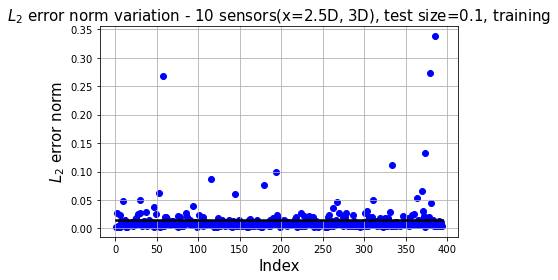

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2.5D, 3D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

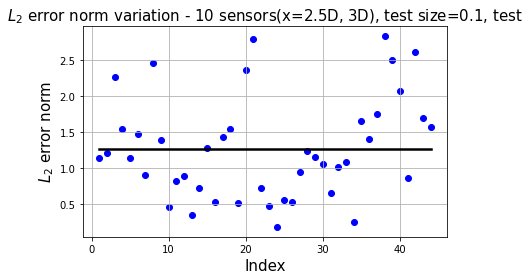

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2.5D, 3D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

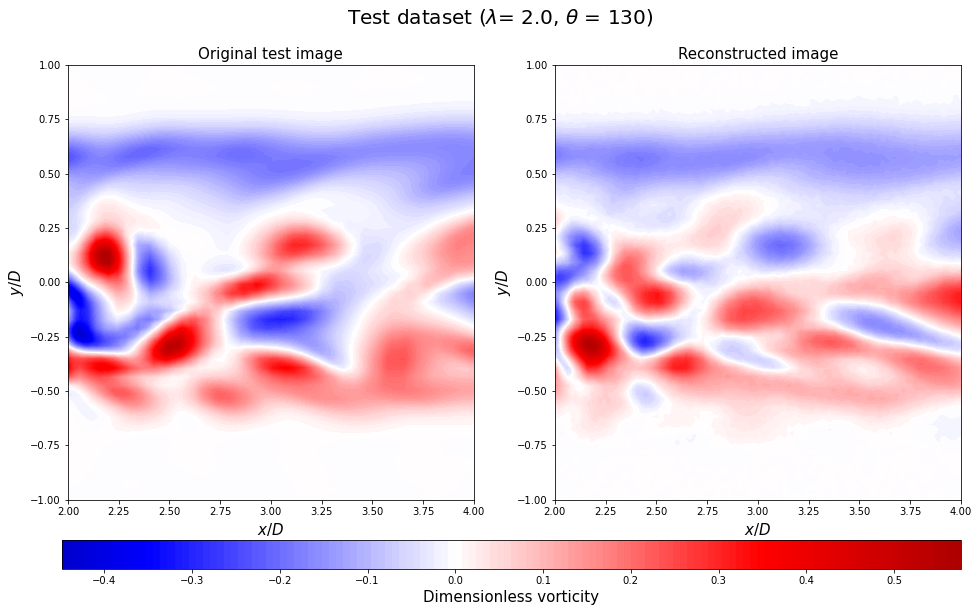

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

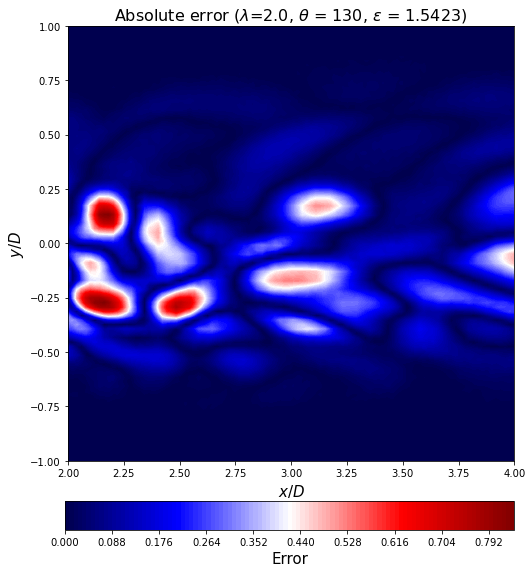

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()